**해군사 AI 과정**

Dat 4: 딥러닝 기초 I (2021-06-03)

User: 문영제

실습 #2: 신경망 모형 학습을 통해 MNIST 패션 데이터를 분류하고 California Housing Price 데이터의 회귀분석 문제도 풀어봄

## 0. 데이터셋 준비

In [1]:
# keras 라이브러리 가져오기

import keras
import tensorflow as tf # 이제는 keras를 사요하기 위해 tf도 사용해야 됩니다
                        # 일부 라이브러리 내용이 tf 패키지로 이동되었어요

In [2]:
# MNIST 패션 데이터 로딩하기

fashion_mnist = tf.keras.datasets.fashion_mnist

---
tf.keras.datasets.fashion_mnist.load_data
- [참조](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

In [3]:
# load_data()는 아래 형식으로 데이터를 가져옵니다.
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# 패션 데이터 크기
X_train_full.shape      # 60,000 개의 28x28 이미지

(60000, 28, 28)

In [5]:
# 패션 데이터 첫 번째 데이터 내용 (28x28 행렬)
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
# target 데이터 크기: 60,000 개의 vector
y_train_full.shape

(60000,)

In [7]:
# target 데이터의 첫 번째 데이터 값
y_train_full[0]

9

In [8]:
# target 데이터의 첫 5 개의 데이터 값들
y_train_full[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
# target 데이터들의 종류를 알아보자!
import numpy as np

np.unique(y_train_full) # numpy의 unique()로 중복성 제거!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

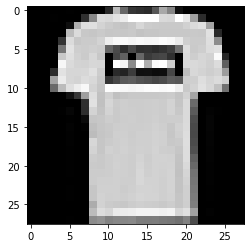

In [10]:
# 28x28 행렬의 데이터를 그림으로 표현하기

import matplotlib.pyplot as plt

plt.imshow(X_train_full[1], cmap='gray') # 첫 번째 데이터를 흑백 그림으로
plt.show()

In [11]:
# target 의 각 숫자값에 해당하는 클래스 명 지정하기

class_names=["T-shirt/top", 'Trouser', 'Pullover', 'Dress', "Coat", 
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# 이제 우리는 class_names를 이용하여, 첫 번째 데이터의 종류를 알 수 있어요.
class_names[y_train_full[0]]

'Ankle boot'

In [13]:
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터 (valdiation set) 으로 분리
# 분리와 동시에 정규화 (255로 나누어 주기; 최대값이 1이 되도록)

# valid와 train으로 나누기
# 60,000 개의 데이터 중 첫 5000개를 valid로 지정, 나머지는 train으로
# 지정과 동시에 255로 나눈 값으로 할당
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# test 데이터 셋은 정규화만
X_test = X_test / 255.0

## 1. 모형 만들기

In [14]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만듦
# - 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만듦
# - 활성함수는 relu 사용

# 신경망 모형 객체
model = keras.models.Sequential()

# 입력층
model.add(keras.layers.Flatten(input_shape=[28, 28])) # 28x28 행렬 입력 데이터

# 은닉층
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# 출력층 (분류 개수만큼 뉴런, 활성함수는 softmax)
model.add(keras.layers.Dense(10, activation="softmax")) 

In [15]:
# 모형의 골격과 모수 개수 출력하기

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 입력층은 flatten()으로 되어 있는데, 비록 우리는 28x28 행렬로 입력하지만, 결국에는 벡터로 입력되어야 하기에 내부적으로 28x28을 flatten으로 (784,) 벡터로 변환시켜줌
- 따로 층에 이름을 부여하지 않으면, dense의 경우, 그냥 dense, dense_1, dense_2 등으로 이름이 부여됨
- 첫 번째 은닉층의 모수 개수: (784 * 300) + 300 = 235,500 (각 입력의 weight와 bias의 합임)
- 즉, 모수 개수는 이전 층 뉴런 개수 * 현재 층 뉴런 개수 + 현재 층 뉴런 수임 (Sequential이며 Dense인 경우에만 이 공식이 성립)

In [16]:
# 모수의 초기값 출력하기

hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

keras의 Dense의 초기값 설정 관련
- keras 문서에 따르면, Dense의 초기값은 kernel_initializer에 값을 설정하여 지정할 수 있으며, 기본값은 "glorot_uniform" 이다. [참조](https://keras.io/ko/layers/core/)
- glorot uniform (Glorot 균등분포)의 설명 [참조](https://reniew.github.io/13/)
- 초기값을 변경할 수 있는 방법들 [참조](https://keras.io/ko/initializers/)

In [17]:
weights

array([[-0.04901455,  0.04743756,  0.06032449, ...,  0.03688519,
         0.03408345, -0.06361747],
       [-0.06852937,  0.01954254,  0.05942844, ..., -0.07104612,
        -0.05486593, -0.0295422 ],
       [-0.02816968,  0.01013557, -0.05305883, ...,  0.06871478,
        -0.04815327,  0.02970582],
       ...,
       [ 0.03156515, -0.05609298,  0.03600278, ...,  0.04369482,
         0.02114759,  0.06484066],
       [ 0.07376802, -0.06150942, -0.07231981, ..., -0.03376188,
        -0.02804161, -0.04932705],
       [-0.05076354, -0.00565451, -0.03529524, ...,  0.02029347,
        -0.05622043,  0.06256327]], dtype=float32)

In [18]:
weights.shape

(784, 300)

가중치는 784 x 300 개입니다.


---



In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

편향은 300개에요.


---



이제 모형을 컴파일해봅시다

In [21]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정)

model.compile(loss="sparse_categorical_crossentropy",   # 손실함수는 교차 엔트로피 
              optimizer="sgd",                          # SGD (mini-batch)
              metrics=["accuracy"])                     # 정확도를 근거로

* metrics: metrics는 측정 함수인데, 학습 모형 성능을 평가하는 데 사용
  - 분류 문제에서는 보통 “accuracy”를 사용 
  - 학습 후에 성능 측정 시 accuracy 항목으로 확인 가능: validation과 비교하는 용도 (학습 후, validation set으로 추론해 보면서, 이 모델을 평가하는 데에 사용)

손실함수 종류: https://keras.io/ko/losses/

## 2. 모형 학습하기

In [22]:
# Epoch 개수를 30개로 설정하여 모형 학습하기

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 2ms/step - loss: 0.9979 - accuracy: 0.6842 - val_loss: 0.5045 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5030 - accuracy: 0.8258 - val_loss: 0.4450 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4576 - accuracy: 0.8404 - val_loss: 0.4134 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.3893 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4061 - accuracy: 0.8561 - val_loss: 0.3907 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3832 - accuracy: 0.8662 - val_loss: 0.3863 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8698 - val_loss: 0.3658 - val_accuracy

* epoch 아래의 1719의미는?
  - 이 모델은 SGD (mini-batch)이며, batch의 기본 size는 32이다. 따라서 train data set의 개수는 (60000 - 5000) = 55,000 에서 32를 나누면, 1,718.75 이므로 1719 번을 실행하면, 1 Epoch를 완료하게 됨

## 3. 학습 결과 확인하기

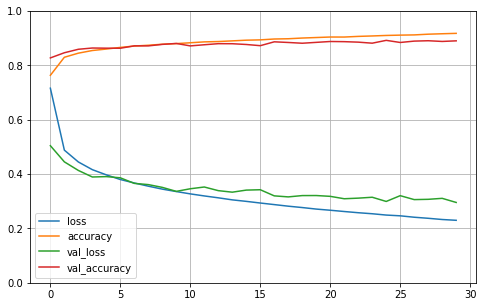

In [23]:
# 학습 곡선 그리기

import pandas as pd
import matplotlib.pyplot as plt

# fit()으로 얻어온 history에는 train과 val의 loss, accuracy 데이터가 있음
pd.DataFrame(history.history).plot(figsize=(8,5)) # history 데이터를 pandas의
                                                  # DataFrame으로 변경한 후,
                                                  # 함수를 그리기 위해 크기 지정
plt.grid(True)              # 그래프 내에 그리드 보이게
plt.gca().set_ylim(0, 1)    # plt.gca()로 Axes 객체를 얻어온 후, y범위를 0~1로
plt.show()

[DataFrame.Plot 참조](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
plt.gca()는 Axes 객체를 얻을 수 있음. Axes 객체를 이용하여 figure 내에 좌표축에 대한 표현 가능

In [25]:
# 학습된 모형으로 test 그림이 각 범주에 속할 확률 출력

X_new = X_test[:3] # 첫 세 개의 test 데이터
y_proba = model.predict(X_new)
y_proba.round(2) # 소수 둘 째자리까지 표시 (반올림하여)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

위 결과는 한 행이 하나의 결과입니다. 첫 번째 test 데이터가 각 분류에 속할 확률을 각 분류 위치에 소수 둘째자리의 확률을 나타내고 있습니다.


---



In [28]:
# 학습된 모형으로 새로운 그림의 범주 예측하기
bigs = np.argmax(y_proba, axis=1)  # axis가 -1인 것은 reverse indexing으로써 
                                   # 가장 마지막 차원을 axis로 (지금의 경우엔 1)
print(bigs)

[9 2 1]


np.argmax: 
- 최대값이 있는 데이터의 위치 (index 번호)
- [참조](https://firework-ham.tistory.com/42)



---



In [34]:
# 실험1

# tmp에 있는 데이터 중에 index 1와 3, 4의 값 출력! 
tmp = np.array([1, 2, 3, 4, 5])
idx = np.array([1, 3, 4])
print(tmp[idx])

[2 4 5]


In [29]:
import numpy as np

# 우리가 구한 bigs의 분류 결과값 (우린 세 개의 test 데이터를 추론함)
# 위 실험1을 사용한 numpy 문법
np.array(class_names)[bigs]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

class_names는 리스트인데, 이것을 np.array로 만든 후에 이에 대한 인덱스들 (bigs)로 출력시킴


---



In [35]:
# 우리가 구한 예측값을 실제 target과 비교

y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [36]:
# 테스트용 데이터에서의 정분류율 출력하기 (test set으로 성능 평가)

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8852


[0.32157742977142334, 0.885200023651123]

In [37]:
# 학습된 모형 저장

model.save("my_keras_model.h5")

In [38]:
# 저장된 모형 로딩

model = keras.models.load_model("my_keras_model.h5")

## 4. California Housing Price 데이터셋에 신경망 모형 적용하여 회귀분석하기

In [40]:
# 데이터셋 로딩, 데이터셋 분리, 데이터 정규화에 필요한 패키지 로딩하기

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
# 데이터셋 로딩하기
housing = fetch_california_housing()

캘리포니아 부동산 가격 데이터 셋은 scikit-learn 패키지에서 다운로드 받을 수도 있어요.
이전 과제에서는 kaggle에서 받은 것입니다.


---



In [47]:
print(list(housing))

['data', 'target', 'feature_names', 'DESCR']


이것은 pandas로 읽어온 데이터가 아니기 때문에 info() 같은 것을 사용할 수 없어요.


---



In [48]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Kaggle에서 가져온 데이터와는 달리, 이 데이터 셋에는 ocean_proximity feature가 없고 missing data도 없습니다. 오직 데이터 정규화만 필요한 상황입니다.


---



In [59]:
housing.data.shape      # kaggle에서 가져온 것의 1/10 크기

(20640, 8)

In [42]:
# 데이터를 학습용 데이터와 테스트용 데이터로 나누기
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터로 나누기
# test_size를 지정하지 않으면, default로 0.25를 가짐

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full)

In [46]:
X_train.shape   # 20640 * 0.75 * 0.75

(11610, 8)

In [49]:
# 데이터 정규화 하기

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [54]:
# 실험1
print(X_train.shape)
print(X_train.shape[1])
print(X_train.shape[1:])

(11610, 8)
8
(8,)


In [55]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 1개이며 뉴런이 30개 인 골격 만들기
# 활성함수는 relu 사용
# practice2 첫 모델과는 달리 한 번에 Sequential()로 만드는 방법

model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1) # 출력층은 단순 값이 나오도록, 활성 함수 불필요
])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [57]:
#모형 컴파일하기(손실함수, 최적화 방법 지정)

model.compile(loss="mean_squared_error", optimizer="sgd")


In [58]:
# Epoch 개수를 20개로 설정하여 모형 학습

history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5282 - val_loss: 0.5391
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6131 - val_loss: 0.4678
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4897 - val_loss: 0.4456
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4689 - val_loss: 0.4379
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4648 - val_loss: 0.4281
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4329 - val_loss: 0.4233
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4330 - val_loss: 0.4158
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4242 - val_loss: 0.4145
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4011
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4086 - val_loss: 0.3997

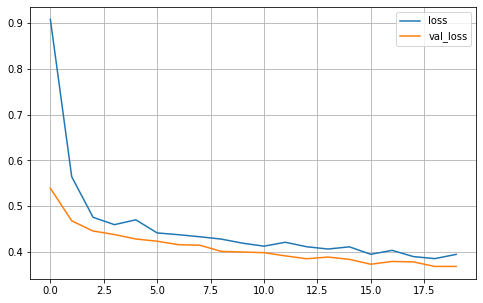

In [60]:
# 학습결과 확인하기

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [61]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4035


In [68]:
# test의 첫 세 개의 데이터
X_new = X_test[:3]

In [69]:
# test 데이터의 예측값은?
y_pred = model.predict(X_new)

In [70]:
# 값 출력 (단 정규화된 값임에 유의)
y_pred

array([[0.9884351],
       [1.850771 ],
       [2.03717  ]], dtype=float32)

In [71]:
# 실제 target 값
y_test[:3]

array([0.55 , 1.755, 1.113])

## 5. **심화** : Functional API 이용하여 복잡한 모형 만들기

### 5.1 예제 1

In [72]:
# keras 의 Functional API 를 활용하여 신경망 모형의 골격 만들기 

input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

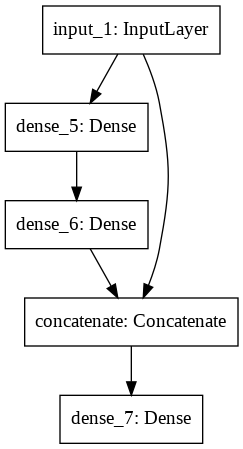

In [73]:
# 모형 도식화 하기

tf.keras.utils.plot_model(model, "my_first_model.png") # 파일이 만들어 집니다

In [74]:
# 모형 컴파일 (손실함수, 최적화 방법 지정)

model.compile(loss="mean_squared_error", optimizer="sgd")


In [75]:
# Epoch 개수를 20개로 설정하여 모형 학습

history=model.fit(X_train, y_train, epochs=20, 
                  validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.3662 - val_loss: 0.5781
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5823 - val_loss: 0.4827
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4795 - val_loss: 0.4657
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 0.4404
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4363 - val_loss: 0.4231
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4296 - val_loss: 0.4284
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4264 - val_loss: 0.4014
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.3814
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3959 - val_loss: 0.3811
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4031 - val_loss: 0.3699

### 5.2 예제 2

In [76]:
# keras 의 Functional API 를 활용하여 신경망 모형의 골격 만들기

input_A = keras.layers.Input(shape=(5,), name="wide input") # 5개 입력 데이터
input_B = keras.layers.Input(shape=(6,), name="deep input") # 6개 입력 데이터
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A, hidden2])
output=keras.layers.Dense(1, name="output")(concat)

model=keras.Model(inputs=[input_A, input_B], outputs=[output])

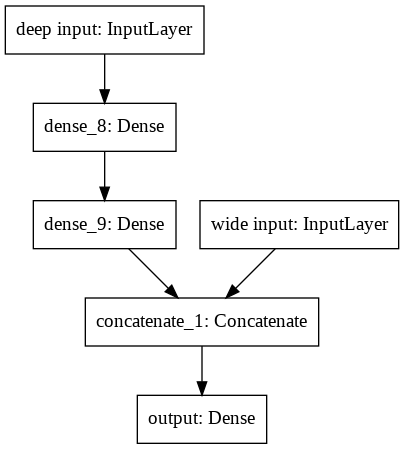

In [77]:
#모형 도식화 하기

tf.keras.utils.plot_model(model, "my_second_model.png")

In [78]:
# 모형 컴파일 (손실함수, 최적화 방법 지정)

model.compile(loss="mean_squared_error", optimizer="sgd")

In [79]:
# Epoch 개수를 20개로 설정하여 모형 학습

# A입력: 0~4열, B입력: 2~7열
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                  validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2605 - val_loss: 0.5296
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5357 - val_loss: 0.4623
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4671 - val_loss: 0.4281
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4151
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4247 - val_loss: 0.4126
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4251 - val_loss: 0.4016
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4134 - val_loss: 0.4019
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4176 - val_loss: 0.3911
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4090 - val_loss: 0.3829
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4053 - val_loss: 0.3769

### 5.3 예제 3: 다중 출력값 모형 만들기

In [85]:
# keras 의 Functional API 를 활용하여 신경망 모형의 골격 만들기

input_A = keras.layers.Input(shape=(5,), name="wide input")
input_B = keras.layers.Input(shape=(6,), name="deep input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)
aux_output=keras.layers.Dense(1, name="aux_output")(hidden2)

model=keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

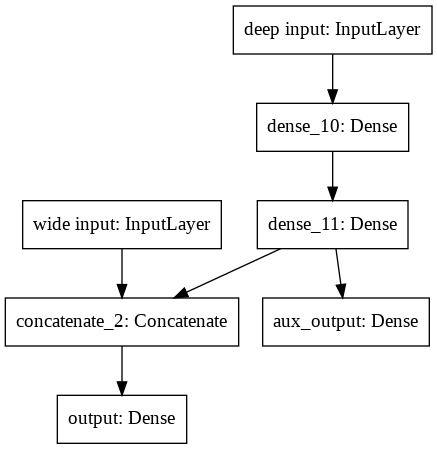

In [86]:
# 모형 도식화 하기

tf.keras.utils.plot_model(model, "my_third_model.png")

In [87]:
# 모형 컴파일 (손실함수, 최적화 방법 지정)

model.compile(loss=["mean_squared_error","mean_squared_error"], 
              loss_weights=[0.9, 0.1], optimizer="sgd") # loss_weights는
                                                        # 다중 출력의 가중치 부여

In [88]:
# Epoch 개수를 20개로 설정하여 모형 학습

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

history = model.fit((X_train_A, X_train_B), (y_train,y_train), epochs=20, 
                  validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8844 - output_loss: 1.7103 - aux_output_loss: 3.4522 - val_loss: 0.5668 - val_output_loss: 0.5028 - val_aux_output_loss: 1.1434
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5729 - output_loss: 0.5132 - aux_output_loss: 1.1096 - val_loss: 0.5172 - val_output_loss: 0.4656 - val_aux_output_loss: 0.9817
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5328 - output_loss: 0.4875 - aux_output_loss: 0.9401 - val_loss: 0.5058 - val_output_loss: 0.4649 - val_aux_output_loss: 0.8740
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4921 - output_loss: 0.4532 - aux_output_loss: 0.8422 - val_loss: 0.4791 - val_output_loss: 0.4435 - val_aux_output_loss: 0.7994
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5005 - output_loss: 0.4704 - aux_output_loss: 0.7709 - val_loss: 0.4655 - val_output_loss: 0.4334 - val_aux_

In [89]:
# 학습 결과 확인하기 

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], 
                                                 [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3911 - output_loss: 0.3772 - aux_output_loss: 0.5161


In [91]:
# 첫 세 개의 test 데이터
X_new_A = X_test[:3, :5]
X_new_B = X_test[:3, 2:]

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [92]:
print(y_pred_main)
print(y_pred_aux)

[[0.67600566]
 [2.0567744 ]
 [1.6724155 ]]
[[0.6621419]
 [2.198443 ]
 [1.4611018]]
